In [1]:
import sys
src_path = "..\\src"
src_path_2 = "..\\venv"

if src_path not in sys.path:
    sys.path.insert(0, src_path)

sys.path.append('C:/Users/sofie/OneDrive - NTNU/4. semester/TDT4114 Anvendt programmering/Milj-dataanalyse/venv/Lib/site-packages')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets

from IPython.display import display
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandasql import sqldf

# Vi har lagt alle funksjonene våre i en egen fil
import functions as fc

# Forberedelser
### Laster ned datasettet

In [2]:
# Laster inn datasettet og kaller det temperature
temperature = pd.read_csv('../data/temperature.csv', usecols=['verdi', 'tidsforskyvning', 'referansetid'])

### Forstå data
Undersøker hvilke datatyper vi har og hvordan datasettet ser ut for å bli kjent med det og lettere jobbe med det senere.

In [3]:
# Viser de fem første linjene
temperature.head()

,verdi,tidsforskyvning,referansetid
0,-4.9,PT0H,2024-01-01T00:00:00.000Z
1,-3.8,PT6H,2024-01-01T00:00:00.000Z
2,-7.4,PT0H,2024-01-02T00:00:00.000Z
3,-5.3,PT6H,2024-01-02T00:00:00.000Z
4,-8.5,PT0H,2024-01-03T00:00:00.000Z


In [4]:
# Viser typen til datasettet
print('type:', type(temperature))

# Viser hvor mange rader og linjer datasettet har
print('form:', temperature.shape)

type: <class 'pandas.core.frame.DataFrame'>
form: (1460, 3)


In [5]:
# Forteller hvilke datatyper de ulike kolonnene har
# Forteller også om det mangler verdier
temperature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   verdi            1460 non-null   float64
 1   tidsforskyvning  1460 non-null   object 
 2   referansetid     1460 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.3+ KB


In [6]:
# printer høyeste og laveste temperatur
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

Den minste verdien er: -18.9
Den høyeste verdien er: 23.3


In [7]:
# Viser ti tilfeldige linjer
temperature.sample(10)

,verdi,tidsforskyvning,referansetid
364,16.2,PT0H,2024-07-01T00:00:00.000Z
1028,15.3,PT0H,2024-05-29T00:00:00.000Z
649,0.3,PT6H,2024-11-20T00:00:00.000Z
726,3.6,PT0H,2024-12-29T00:00:00.000Z
1025,12.7,PT6H,2024-05-27T00:00:00.000Z
1261,4.6,PT6H,2024-09-22T00:00:00.000Z
1084,11.3,PT0H,2024-06-26T00:00:00.000Z
286,20.5,PT0H,2024-05-23T00:00:00.000Z
647,0.3,PT6H,2024-11-19T00:00:00.000Z
862,1.6,PT0H,2024-03-07T00:00:00.000Z


In [8]:
# Viser de fem siste linjene
temperature.tail()

,verdi,tidsforskyvning,referansetid
1455,1.1,PT6H,2024-12-28T00:00:00.000Z
1456,1.7,PT0H,2024-12-29T00:00:00.000Z
1457,2.8,PT6H,2024-12-29T00:00:00.000Z
1458,0.2,PT0H,2024-12-30T00:00:00.000Z
1459,1.0,PT6H,2024-12-30T00:00:00.000Z


### Manglende verdier
Selv om vi sjekket hele datasettet og bare gikk videre med de kollonene som hadde alle dataene, er det greit å dobbeltsjekke at vi ikke mangler noen tall.

verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64
Empty DataFrame
Columns: [verdi, tidsforskyvning, referansetid]
Index: []


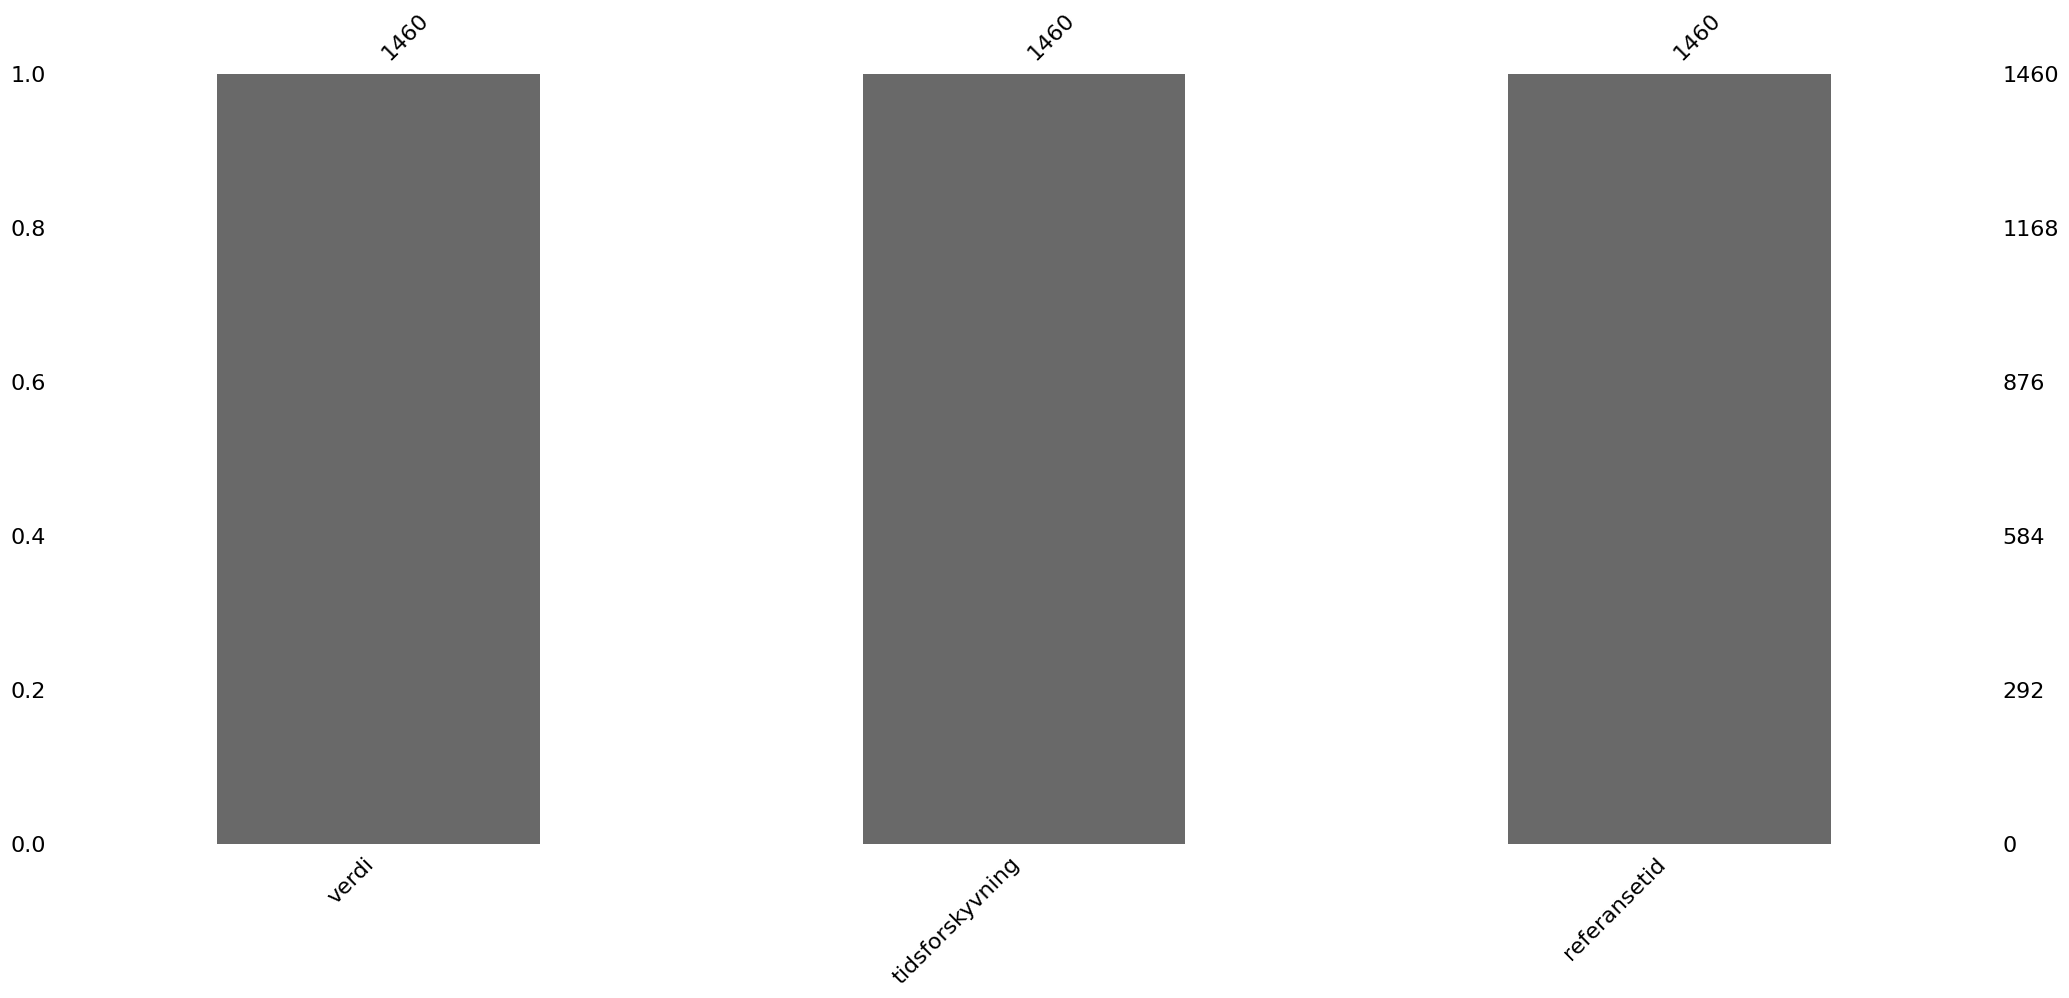

In [9]:
# Sjekker hvor mange av verdiene som mangler
fc.missing_numbers(temperature)

In [10]:
duplicates = temperature.duplicated().sum()
print("Number of duplicate records:", duplicates)


Number of duplicate records: 1


In [11]:
positive = temperature.query('verdi >= 0')
print(f'Det er {len(positive)} temperaturer som er 0 eller høyere')

negative = temperature.query('verdi < 0')
print(f'Det er {len(negative)} temperaturer som mindre enn 0')

print(f'Det er til sammens {len(positive) + len(negative)} verdier')

Det er 1134 temperaturer som er 0 eller høyere
Det er 326 temperaturer som mindre enn 0
Det er til sammens 1460 verdier


### Ekstreme verdier
Siden datasettet ikke inneholder noen ekstreme verdier, har vi valgt å legge inn noen. Dette er for å vise at vi vet hva som kan gjøres om vi har verdier som ikke burde være med i analysen.

referansetid er gjort om til DateTime
[ 147  676 1304 1372 1427]
[15 19 15 16 19]
Den minste verdien er: -131.1
Den høyeste verdien er: 81.0


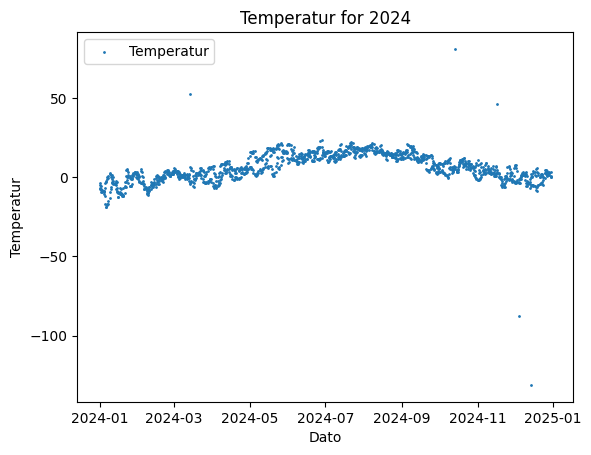

In [12]:
# Gjør referansetid om til datetime
date = fc.make_datetime(temperature)

# Lagrer de linjene i temperature det går utover
np.random.seed(123)

# Sier jeg vil ha 5 verdier og at de skal velges ut ifra lengden på temperature
numExtreme = 5
mod_indices = np.random.choice(len(temperature), numExtreme, replace=False)
print(mod_indices)

# Velger så 5 verdier mellom 15 og 19 
extreme_value = np.random.randint(15, 20, len(mod_indices))
print(extreme_value)

# Så ganger jeg de valgte verdiene i temperature med extreme_values
temperature.loc[mod_indices, 'verdi'] *= extreme_value

# Printer hva den høyeste og laveste verdien er 
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

# Visualiserer datasettet med extreme verdier
plt.scatter(date, temperature['verdi'], label="Temperatur", s=1)
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Temperatur for 2024') 
plt.legend()
plt.show()


Selv om vi har lagt til ekstreme verdier, er det ikke noe vi ønsker å ta med videre i dataanalysen. Ekstreme og unarturlige verdier påvirker både visualiseringen og undersøkelsene av datasettet som vi har tenkt å gjøre. For eksempel så trekker de opp eller ned gjennomsnittet. 

Derfor har jeg valgt å lage outliners. Outliners bruker standardavvik til å finne ut hvilke av verdiene som er for langt vekke fra gjennomsnittet. Disse kollonene må vi gjøre noe med.

Gjennomsnittlig verdi for datasettet er 6.21
Standardavviket er 9.47
      verdi tidsforskyvning              referansetid
147    52.5            PT6H 2024-03-14 00:00:00+00:00
676   -87.4            PT0H 2024-12-04 00:00:00+00:00
1304   81.0            PT0H 2024-10-14 00:00:00+00:00
1372   46.4            PT0H 2024-11-17 00:00:00+00:00
1427 -131.1            PT6H 2024-12-14 00:00:00+00:00


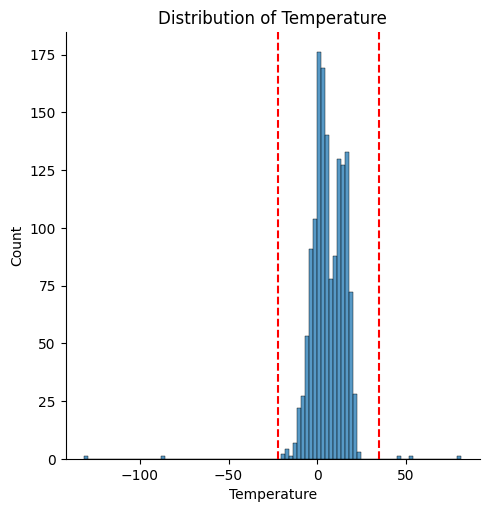

In [13]:
# Finner øvre og nedre grense
lower_limit, upper_limit = fc.lower_upper_limit(temperature)

# Sier at de verdiene som er utenfor grensene lagres i outliers
outliers = temperature[temperature['verdi'].between(lower_limit, upper_limit) == False]
print(outliers) 

# Visualiserer datasettet med øvre og nedre grense 
plot = sns.displot(data=temperature['verdi']).set(title="Distribution of Temperature", xlabel="Temperature")
for ax in plot.axes.flat:
    ax.axvline(lower_limit, color='r', linestyle='--', label='Lower Limit')
    ax.axvline(upper_limit, color='r', linestyle='--', label='Upper Limit')

Her ser vi at de fem ekstreme verdiene vi har lagt til er utenfor standardavviket. De blir derfor ikke tatt med når vi gjør resten av dataanalysen.

[52.5, -87.39999999999999, 81.0, 46.4, -131.1]
Den minste verdien er: -18.9
Den høyeste verdien er: 23.3


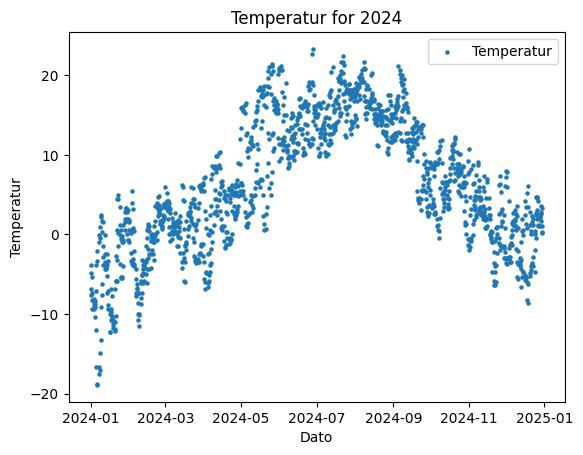

In [14]:
# Alle verdiene som er utenfor standardavviket legges i lista remove
remove = []
for i in outliers['verdi']:
    remove.append(i)
print(remove)

# Verdiene i temperature som er lik verdiene i remove byttes ut med NaN
temperature['verdi'] = temperature['verdi'].replace(remove, np.nan)

# print den laveste og høyeste verdien for å vise at verdiene har endret seg
print('Den minste verdien er:', temperature['verdi'].min())
print('Den høyeste verdien er:', temperature['verdi'].max())

# Visualiserer datasettet uten ekstreme verdier
plt.scatter(date, temperature['verdi'], label="Temperatur", s=5)
plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Temperatur for 2024') 
plt.legend()
plt.show()

verdi              5
tidsforskyvning    0
referansetid       0
dtype: int64
      verdi tidsforskyvning              referansetid
147     NaN            PT6H 2024-03-14 00:00:00+00:00
676     NaN            PT0H 2024-12-04 00:00:00+00:00
1304    NaN            PT0H 2024-10-14 00:00:00+00:00
1372    NaN            PT0H 2024-11-17 00:00:00+00:00
1427    NaN            PT6H 2024-12-14 00:00:00+00:00


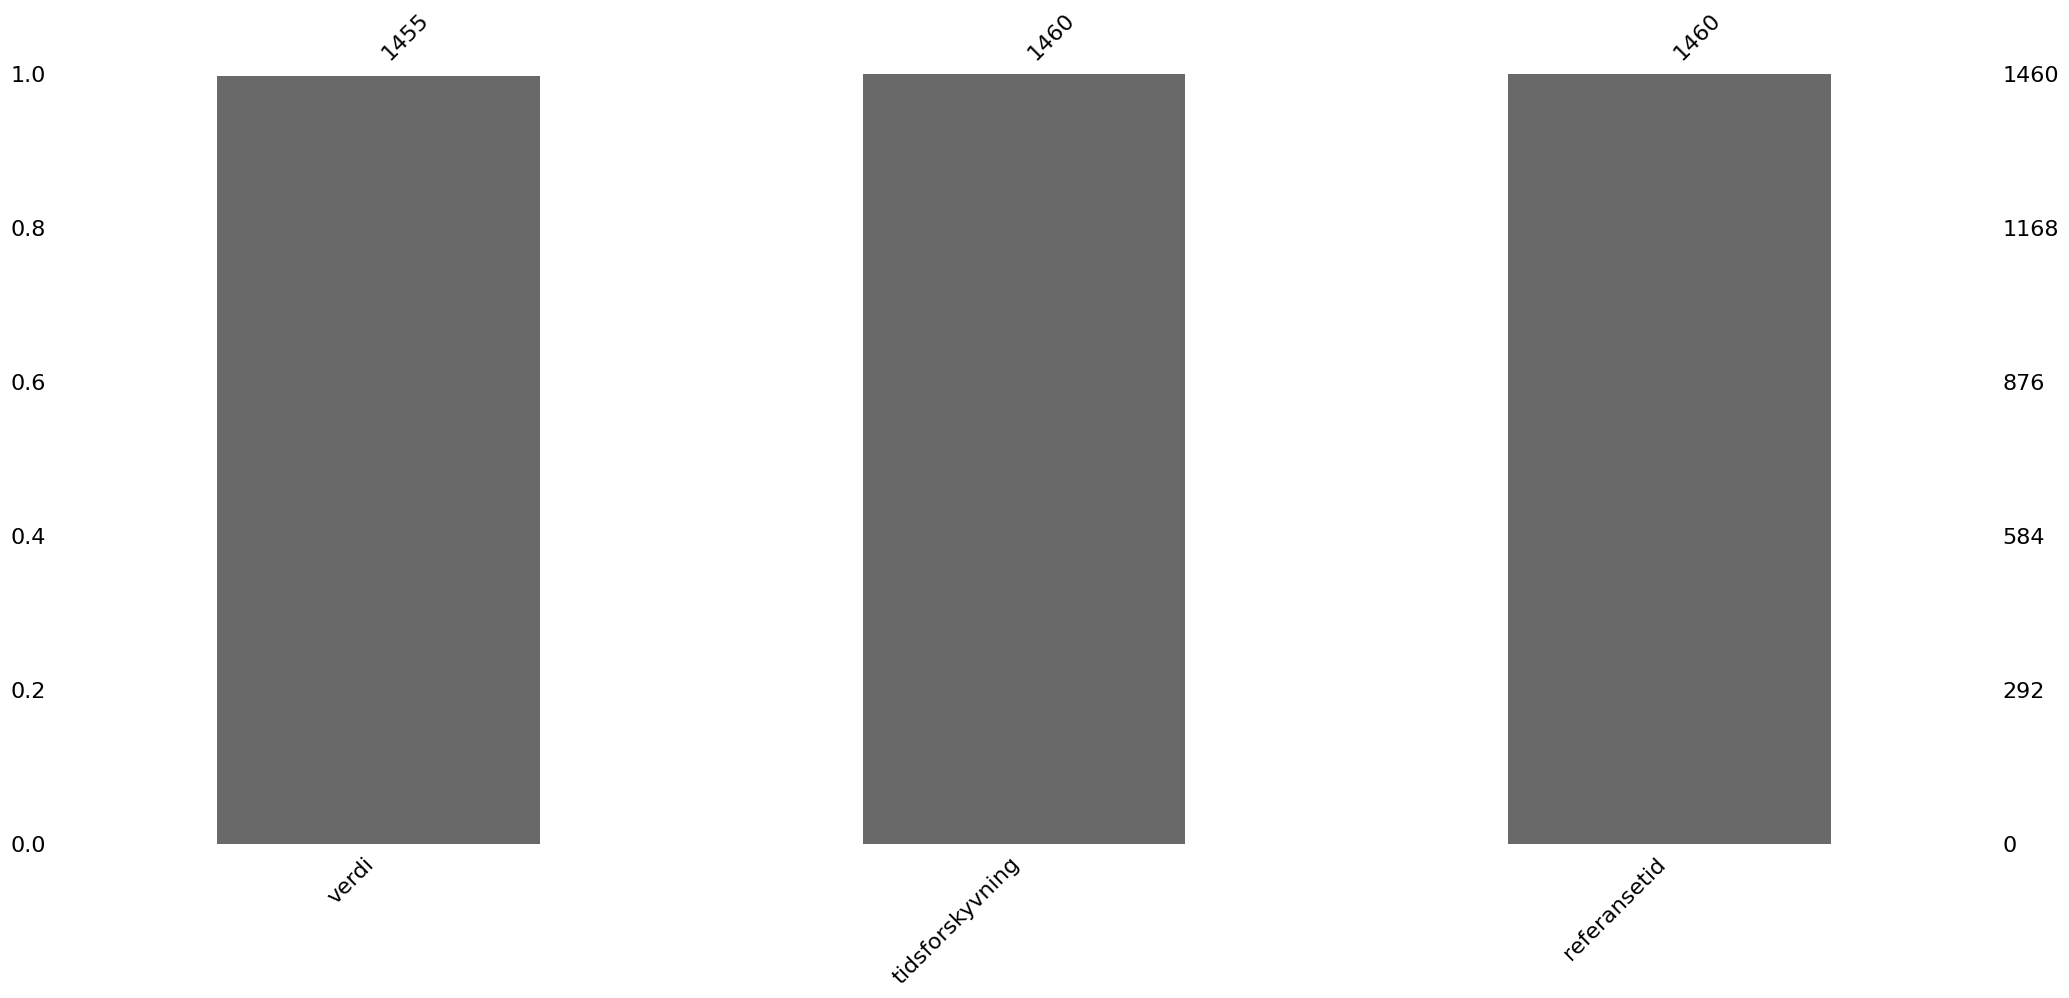

In [15]:
# Sjekker hvor mange og hvilke av verdiene som mangler
fc.missing_numbers(temperature)

verdi              0
tidsforskyvning    0
referansetid       0
dtype: int64


C:\Users\sofie\AppData\Local\Temp\ipykernel_11380\606207285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  add_data = temperature['verdi'].fillna(method='ffill', inplace=True)
C:\Users\sofie\AppData\Local\Temp\ipykernel_11380\606207285.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  add_data = temperature['verdi'].fillna(method='ffill', inplace=True)


Empty DataFrame
Columns: [verdi, tidsforskyvning, referansetid]
Index: []


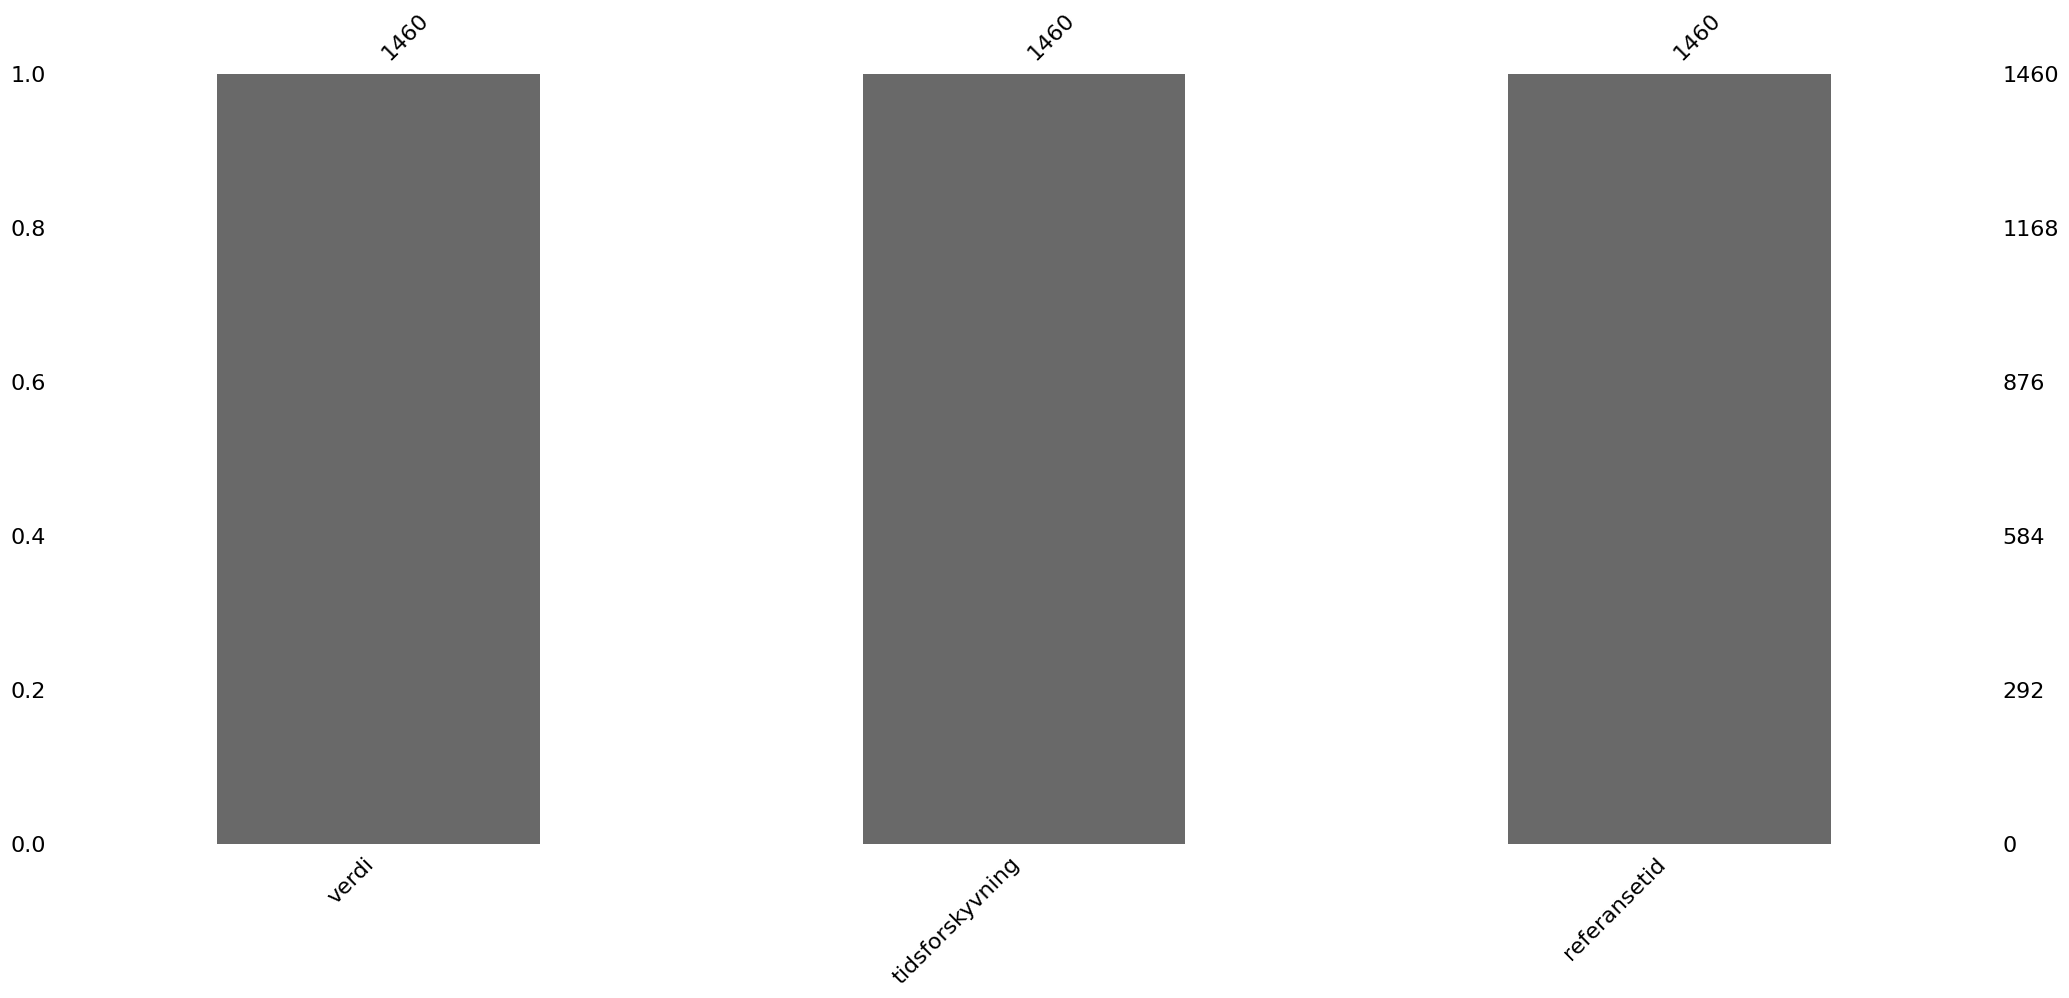

In [16]:
# Gjør NaN om til neste verdi i fila 
add_data = temperature['verdi'].fillna(method='ffill', inplace=True)

# Sjekker at verdiene er fylt inn
fc.missing_numbers(temperature)

Legger det rensa datasettet inn i en egen csv-fil og laster den inn til dokumentet.

Datasettet heter nå clean_temp

In [17]:
temperature.to_csv('../data/clean_temperature.csv', index=False)

# Importerer den nye temperatur fila
clean_temp = pd.read_csv('../data/clean_temperature.csv')

# Gjør referansetid om til datetime for å bruke i diverse utregninger
date = fc.make_datetime(clean_temp)

referansetid er gjort om til DateTime


# Ulike visualiseringer

### Tidsforskyvning og verdi

Jobber med å visualisere de forskjellige tidsforskyvningene og temperaturene. Plottet er interaktivt og det kan zoomes inn. I tillegg til at du selv kan velge om det skal farge tidsforskyvningen eller verdien.

In [24]:
def plot(farge='verdi'):
    # Lager interaktivt plot
    fig = px.scatter(clean_temp, 
                    x= 'referansetid', 
                    y= 'verdi', 
                    color= farge, 
                    trendline= 'ols'
                    )

    fig.update_layout(title=dict(text='Temperatur')
    )
    fig.show()



widgets.interact(plot, farge=['tidsforskyvning', 'verdi'])

interactive(children=(Dropdown(description='farge', index=1, options=('tidsforskyvning', 'verdi'), value='verd…

<function __main__.plot(farge='verdi')>

#### Tidsforskyvning
Ut ifra dette plottet der tidsforskyvning bestemmer fargene virker det ikke som at de ulike tidsforskyvningene påvirker temperaturen så veldig.

In [19]:
# Finner gjennomsnittet for hver av tidsforskyvningene
fc.average_other(clean_temp, "tidsforskyvning")

tidsforskyvning
PT0H    6.25
PT6H    6.24
Name: verdi, dtype: float64

Gjennomsnittet av tidsforskyvningene bekrefter det plottet viser om tidsforskyvningen.

#### Verdi
Når det er verdien, altså temperaturen, som bestemmer fargene, er det vanskeligere å se nøyaktige sammenhenger. Hvis du studerer det nøye kan det se ut som at den rød/oransj lignende fargen er den som forekommer flest ganger.

Det tyder på at det ikke er en god visualasjon for å vise akkurat det.

Text(0.5, 0, 'Temperatur')

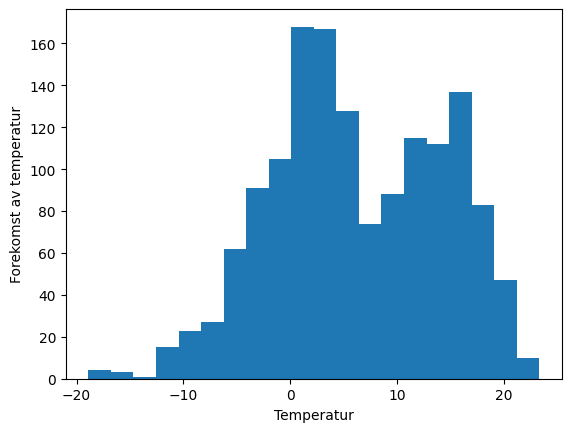

In [20]:
plt.hist(clean_temp['verdi'], density=False, bins=20)  
plt.ylabel('Forekomst av temperatur')
plt.xlabel('Temperatur')

Ved hjelp av dette histogrammet er det veldig lett å se hvilke temperaturer som forekommer flest ganger. Temperaturene mellom 0 og 4 er de temperaturene som har vært flest ganger i løpet av året. Det gir mening siden vår og høst har like temperaturer og de ligger ofte i det området.

### Statistiske verdier
Jobber her med å visualisere ulike statistiske verdier. Planen er å også lage funksjoner for median og standeravvik. Disse funksjonene lages sånn at de kan brukes på alle tre av datasettene våre uten at vi må gjøre endringer i selve koden. 

Gjennomsnittlig verdi for datasettet er 6.25
Medianen er 5.4


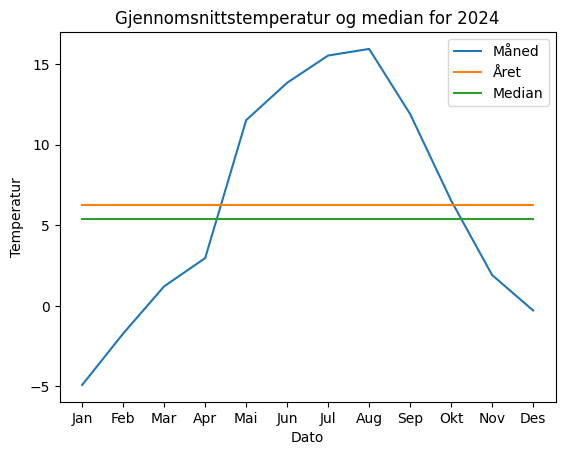

In [21]:
# Regner ut gjennomsnittet for hver måned
monthly_average = fc.average_other(clean_temp)

# Visualiserer gjennomsnittlig temperatur for hver måned
months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'] 
plt.plot(months, monthly_average, label="Måned")

# Visualiserer gjennomsnittstemperaturen for hele året
mean = fc.average_year(clean_temp)
plt.plot(months, mean*np.ones(len(months)), label="Året")

# Visualiserer medianen
median = fc.median(temperature)
plt.plot(months, median*np.ones(len(months)), label="Median")

plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Gjennomsnittstemperatur og median for 2024') 
plt.legend()

Visualiseringen av gjennomsnittstemperaturene per måned viser at det er høyest temperatur på sommeren og at temperaturen igjen synker frem mot vinteren. Ut ifra hvordan vi vet temperaturene pleier å være, gir dette absolutt mening.

Gjennomsnittet for året ligger omtrent midt på grafen for det månedlige gjennomsnittet og det virker derfor som at gjennomsnittet er korrekt.

Medianen ligger litt under gjennomsnittet. 

# Predikativ analyse

For å gjøre en predikativ analyse må datasettet først deles inn i to. En til trening og en til testing. Trening brukes til å lage regresjonen og test brukes til å sjekke om den passer inn til den delen av datasettet også.

In [22]:
X_train, X_test, y_train, y_test = fc.train_test_set(clean_temp, 0.3)

NameError: name 'fc' is not defined

Regresjonen lages med train datasettet og så plottes det for å se om det passer.

koeffisienter: 0.021502718107058314
konstantledd: 2.042421079045712


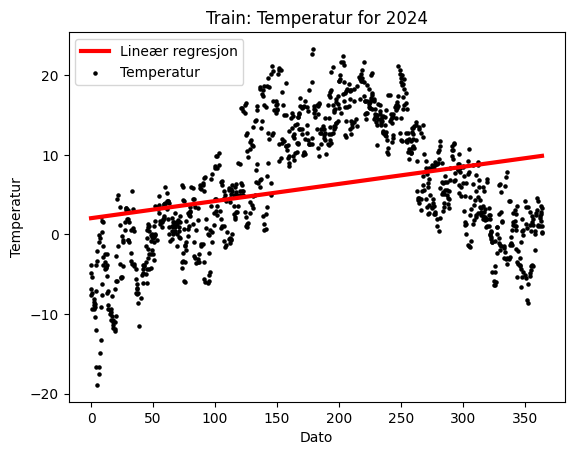

In [ ]:
# Visualiserer temperaturen med lineær regresjon
regr, lin_y_pred = fc.linear(X_train, y_train)

plt.plot(X_train, lin_y_pred, color='red', linewidth=3, label='Lineær regresjon')
plt.scatter(X_train, y_train, color='black', s=5, label='Temperatur')

plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Train: Temperatur for 2024') 
plt.legend()
plt.show()

Så plottes samme regresjon med test dataen.

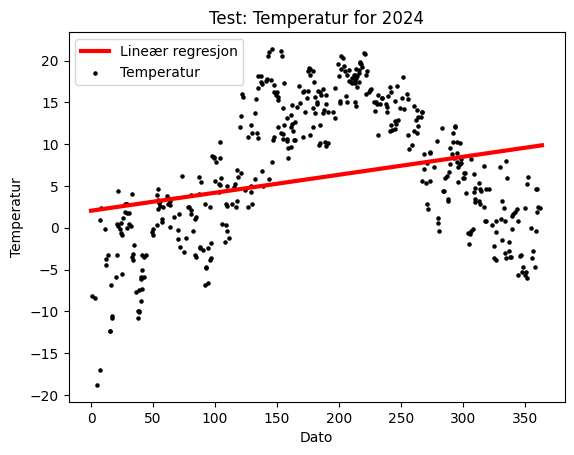

In [ ]:
plt.plot(X_train, lin_y_pred, color='red', linewidth=3, label='Lineær regresjon')
plt.scatter(X_test, y_test, color='black', s=5, label='Temperatur')

plt.xlabel('Dato') 
plt.ylabel('Temperatur') 
plt.title('Test: Temperatur for 2024') 
plt.legend()
plt.show()

Som det sees her gir ikke en lineær regresjon et godt utgangspunkt for predikativ analyse. Derfor har jeg heller brukt en polynom-regresjon.

koeffisienter: 0.24726742765642423 -0.0006219167344823643
konstantledd: -11.357223306578257


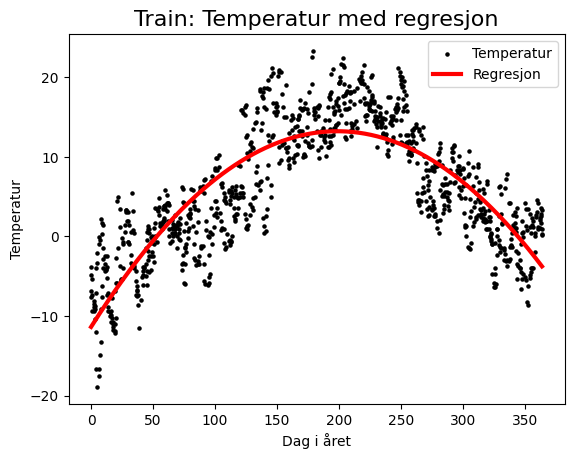

In [ ]:
poly_regr, poly_y_pred = fc.poly(X_train, y_train)

plt.scatter(X_train, y_train, color='black', s=5, label='Temperatur')
plt.plot(X_train, poly_y_pred, color='red', linewidth=3, label='Regresjon')

plt.title('Train: Temperatur med regresjon', size=16)
plt.xlabel('Dag i året') 
plt.ylabel('Temperatur') 
plt.legend()
plt.show()

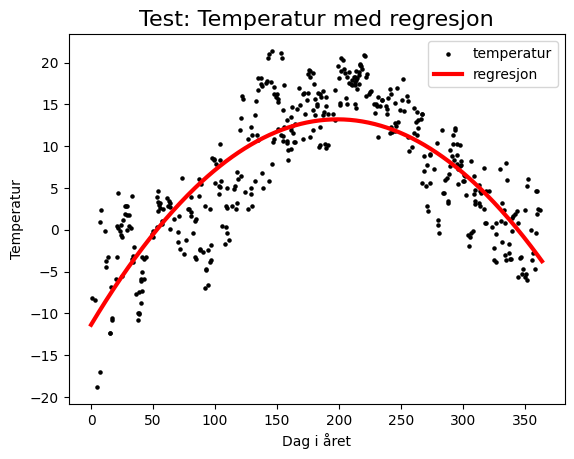

In [ ]:
plt.scatter(X_test, y_test, color='black', s=5, label='temperatur')
plt.plot(X_train, poly_y_pred, color='red', linewidth=3, label='regresjon')

plt.title('Test: Temperatur med regresjon', size=16)
plt.xlabel('Dag i året') 
plt.ylabel('Temperatur') 
plt.legend()
plt.show()

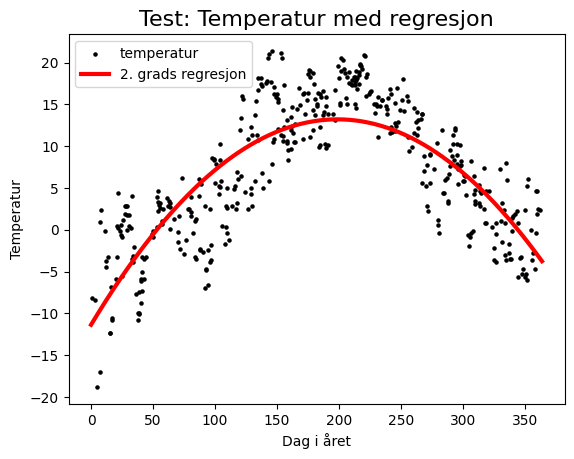

In [ ]:
plt.scatter(X_test, y_test, color='black', s=5, label='temperatur')
plt.plot(X_train, poly_y_pred, color='red', linewidth=3, label='2. grads regresjon')

plt.title('Test: Temperatur med regresjon', size=16)
plt.xlabel('Dag i året') 
plt.ylabel('Temperatur') 
plt.legend()
plt.show()

Vi kan se visuelt at andregradsregresjonen passer mye bedre enn den linære regresjonen, men det kan også vises gjennom å regne ut kvadratisk gjennomsnitt. Det er gjennomsnittlig avstand alle datapunktene har opphøyd i andre. 

In [ ]:
# gjennomsnittlig avstand alle datapunktene har opphøyd i andre
print('Kvadratisk gjennomsnitt for den lineære regresjonen er:')
print(mean_squared_error(y_train, lin_y_pred))

print('Kvadratisk gjennomsnitt for andregradsregresjonen er:')
print(mean_squared_error(y_train, poly_y_pred))



Kvadratisk gjennomsnitt for den lineære regresjonen er:
58.3729868206338
Kvadratisk gjennomsnitt for andregradsregresjonen er:
19.474578829592698


Andregradsregresjonen har mye lavere kvadratisk gjennomsnitt enn den lineære. Så det viser matematisk at andregradsregresjonen passer best.